In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("datos_finales_no_outliers.csv")

In [4]:
df.columns

Index(['Estación', 'Año', 'Mes', 'Dia', 'Hora', 'Dióxido de Azufre',
       'Monóxido de Carbono', 'Monóxido de Nitrógeno', 'Dióxido de Nitrógeno',
       'Partículas<2.5', 'Partículas<10', 'Óxidos de Nitrógeno', 'Ozono',
       'Tolueno', 'Benceno', 'Etilbenceno', 'HidrocarburosTot', 'Metano',
       'HidrocarburosNoMet', 'Temperatura', 'PuntoRocio', 'TempHumeda',
       'HumedadRelativa', 'Precipitacion', 'Presion', 'VelViento', 'DirViento',
       'Intensidad'],
      dtype='object')

Las primeras columnas que implementare son si la estación mide la variable target que busco para reforzar el modelo y que sepa bien que los 0 equivalen a no mediciones

In [6]:
media_no2 = df.groupby("Estación")['Dióxido de Nitrógeno'].mean()
media_pm25 = df.groupby("Estación")['Partículas<2.5'].mean()
media_o3 = df.groupby("Estación")['Ozono'].mean()

In [7]:
col_target = ["Dióxido de Nitrógeno","Partículas<2.5","Ozono"]

In [8]:
mide_no2 = {}
mide_pm25 = {}
mide_o3 = {}
for estacion in df.Estación.unique():
    media_no2 = df[df['Estación'] == estacion]['Dióxido de Nitrógeno'].mean()
    media_pm25 = df[df['Estación'] == estacion]['Partículas<2.5'].mean()
    media_o3 = df[df['Estación'] == estacion]['Ozono'].mean()

    if media_no2 == 0:
        mide_no2[estacion] = 0
    elif media_no2 != 0:
        mide_no2[estacion] = 1

    if media_pm25 == 0:
        mide_pm25[estacion] = 0
    elif media_pm25 != 0:
        mide_pm25[estacion] = 1

    if media_o3 == 0:
        mide_o3[estacion] = 0
    elif media_o3 != 0:
        mide_o3[estacion] = 1

In [9]:
mide_o3

{4: 0,
 8: 1,
 11: 0,
 16: 1,
 17: 1,
 18: 1,
 24: 1,
 27: 1,
 35: 1,
 36: 0,
 38: 0,
 39: 1,
 40: 0,
 47: 0,
 48: 0,
 49: 1,
 50: 0,
 54: 1,
 55: 0,
 56: 1,
 57: 0,
 59: 1,
 60: 1}

In [10]:
df['MideSO2'] = df["Estación"].map(mide_no2)
df['MidePM2.5'] = df["Estación"].map(mide_pm25)
df['MideO3'] = df["Estación"].map(mide_o3)

In [11]:
df

,Estación,Año,Mes,Dia,Hora,Dióxido de Azufre,Monóxido de Carbono,Monóxido de Nitrógeno,Dióxido de Nitrógeno,Partículas<2.5,...,TempHumeda,HumedadRelativa,Precipitacion,Presion,VelViento,DirViento,Intensidad,MideSO2,MidePM2.5,MideO3
0,4,2013,7,1,1.0,5.0,0.5,48.0,112.0,0.0,...,12.48,55.35,0.0,92.79,1.04,118.0,374.250,1,0,0
1,4,2013,7,1,2.0,5.0,0.6,79.0,116.0,0.0,...,11.92,59.08,0.0,92.78,1.11,115.6,402.500,1,0,0
2,4,2013,7,1,3.0,4.0,0.3,6.0,47.0,0.0,...,11.51,62.16,0.0,92.79,1.26,107.6,243.000,1,0,0
3,4,2013,7,1,4.0,3.0,0.2,3.0,25.0,0.0,...,11.23,65.06,0.0,92.81,1.48,100.5,174.500,1,0,0
4,4,2013,7,1,5.0,3.0,0.2,3.0,10.0,0.0,...,11.80,63.04,0.0,92.83,2.28,97.3,187.250,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319499,60,2024,12,31,20.0,0.0,0.0,16.0,65.0,0.0,...,0.36,72.42,0.0,93.83,1.26,26.4,54.500,1,0,1
2319500,60,2024,12,31,21.0,0.0,0.0,33.0,77.0,0.0,...,-0.19,73.36,0.0,93.85,1.28,40.9,49.000,1,0,1
2319501,60,2024,12,31,22.0,0.0,0.0,29.0,68.0,0.0,...,-0.52,74.79,0.0,93.88,1.26,54.7,9.750,1,0,1
2319502,60,2024,12,31,23.0,0.0,0.0,7.0,47.0,0.0,...,-0.72,77.49,0.0,93.90,1.26,67.5,21.500,1,0,1


El siguiente paso sera el tratamiento de las variables temporales que en en analisis temporal hemos visto que tienen importancia ya que hay tendencias anuales mensuales y horarias en los datos. Para ello hare el seno y el coseno de las variables temporales

In [17]:
df_temp = df.rename(columns={'Año': 'year', 'Mes': 'month', 'Dia': 'day'})
df['Fecha'] = pd.to_datetime(df_temp[['year', 'month', 'day']])
#Primero comenzare por los meses:
df['Mes_sen'] = np.sin(2 * np.pi * (df['Mes'] - 1) / 12)
df['Mes_cos'] = np.cos(2 * np.pi * (df['Mes'] - 1) / 12)
#Luego generare las de los dias:
df['DiasEnMes'] = df['Fecha'].dt.daysinmonth
df['DiaDelMes_sen'] = np.sin(2 * np.pi * (df['Dia'] - 1) / df['DiasEnMes'])
df['DiaDelMes_cos'] = np.cos(2 * np.pi * (df['Dia'] - 1) / df['DiasEnMes'])
df = df.drop(columns=['DiasEnMes'])
#Los años daran problema ya que los datos empiezan el 1 de julio de 2013 y acaban el 31 de didciembre del 24, para resolver esto hare un ciclo de
#12 años en vez de 11.5 perdiendo el ultimo medio ciclo:
periodo_total = 2024 - 2013 + 1
df['Año_normalizado'] = (df['Año'] - 2013) / (periodo_total - 1)
df['Año_sen'] = np.sin(2 * np.pi * df['Año_normalizado'])
df['Año_cos'] = np.cos(2 * np.pi * df['Año_normalizado'])
df = df.drop(columns=['Año_normalizado'])

df = df.drop(columns="Fecha")

In [22]:
df 

,Estación,Año,Mes,Dia,Hora,Dióxido de Azufre,Monóxido de Carbono,Monóxido de Nitrógeno,Dióxido de Nitrógeno,Partículas<2.5,...,Intensidad,MideSO2,MidePM2.5,MideO3,Mes_sen,Mes_cos,DiaDelMes_sen,DiaDelMes_cos,Año_sen,Año_cos
0,4,2013,7,1,1.0,5.0,0.5,48.0,112.0,0.0,...,374.250,1,0,0,1.224647e-16,-1.000000,0.000000,1.00000,0.000000e+00,1.0
1,4,2013,7,1,2.0,5.0,0.6,79.0,116.0,0.0,...,402.500,1,0,0,1.224647e-16,-1.000000,0.000000,1.00000,0.000000e+00,1.0
2,4,2013,7,1,3.0,4.0,0.3,6.0,47.0,0.0,...,243.000,1,0,0,1.224647e-16,-1.000000,0.000000,1.00000,0.000000e+00,1.0
3,4,2013,7,1,4.0,3.0,0.2,3.0,25.0,0.0,...,174.500,1,0,0,1.224647e-16,-1.000000,0.000000,1.00000,0.000000e+00,1.0
4,4,2013,7,1,5.0,3.0,0.2,3.0,10.0,0.0,...,187.250,1,0,0,1.224647e-16,-1.000000,0.000000,1.00000,0.000000e+00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319499,60,2024,12,31,20.0,0.0,0.0,16.0,65.0,0.0,...,54.500,1,0,1,-5.000000e-01,0.866025,-0.201299,0.97953,-2.449294e-16,1.0
2319500,60,2024,12,31,21.0,0.0,0.0,33.0,77.0,0.0,...,49.000,1,0,1,-5.000000e-01,0.866025,-0.201299,0.97953,-2.449294e-16,1.0
2319501,60,2024,12,31,22.0,0.0,0.0,29.0,68.0,0.0,...,9.750,1,0,1,-5.000000e-01,0.866025,-0.201299,0.97953,-2.449294e-16,1.0
2319502,60,2024,12,31,23.0,0.0,0.0,7.0,47.0,0.0,...,21.500,1,0,1,-5.000000e-01,0.866025,-0.201299,0.97953,-2.449294e-16,1.0


Para ayudar a la prediccion creare una columna nueva que contenga el valor del contaminante target la hora anterior, y otra el valor del dia anterior a esa hora

In [24]:
col_target

['Dióxido de Nitrógeno', 'Partículas<2.5', 'Ozono']

In [25]:
df = df.sort_values(by=["Estación","Año","Mes","Hora","Dia"])
#Primero generare los valores de la hora anterior:
df["NO2_hora"] = df.groupby("Estación")["Dióxido de Nitrógeno"].shift(1)
df["PM25_hora"] = df.groupby("Estación")["Partículas<2.5"].shift(1)
df["O3_hora"] = df.groupby("Estación")["Ozono"].shift(1)
#Despues los del dia anterior:
df["NO2_dia"] = df.groupby("Estación")["Dióxido de Nitrógeno"].shift(24)
df["PM25_dia"] = df.groupby("Estación")["Partículas<2.5"].shift(24)
df["O3_dia"] = df.groupby("Estación")["Ozono"].shift(24)

In [27]:
col_lag = ["NO2_hora","PM25_hora","O3_hora","NO2_dia","PM25_dia","O3_dia"]

In [28]:
col_lag = ["NO2_hora","PM25_hora","O3_hora","NO2_dia","PM25_dia","O3_dia"]
df[col_lag] = df.groupby(["Estación", "Hora"])[col_lag].transform(lambda x: x.fillna(x.mean()))

In [97]:
df

,Estación,Año,Mes,Dia,Hora,Dióxido de Azufre,Monóxido de Carbono,Monóxido de Nitrógeno,Dióxido de Nitrógeno,Partículas<2.5,...,DiaDelMes_cos,Año_sen,Año_cos,MideO3,NO2_hora,PM25_hora,O3_hora,NO2_dia,PM25_dia,O3_dia
0,4,2013,7,1,1.0,5.0,0.5,48.0,112.0,0.0,...,1.000000,0.000000e+00,1.0,0,40.173234,0.0,0.0,44.689359,0.0,0.0
24,4,2013,7,2,1.0,3.0,0.2,3.0,18.0,0.0,...,0.979530,0.000000e+00,1.0,0,112.000000,0.0,0.0,44.689359,0.0,0.0
48,4,2013,7,3,1.0,3.0,0.3,4.0,49.0,0.0,...,0.918958,0.000000e+00,1.0,0,18.000000,0.0,0.0,44.689359,0.0,0.0
72,4,2013,7,4,1.0,3.0,0.2,4.0,12.0,0.0,...,0.820763,0.000000e+00,1.0,0,49.000000,0.0,0.0,44.689359,0.0,0.0
96,4,2013,7,5,1.0,3.0,0.2,4.0,14.0,0.0,...,0.688967,0.000000e+00,1.0,0,12.000000,0.0,0.0,44.689359,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319407,60,2024,12,27,24.0,0.0,0.0,6.0,39.0,0.0,...,0.528964,-2.449294e-16,1.0,1,58.000000,0.0,3.0,8.000000,0.0,65.0
2319431,60,2024,12,28,24.0,0.0,0.0,11.0,57.0,0.0,...,0.688967,-2.449294e-16,1.0,1,39.000000,0.0,10.0,37.000000,0.0,27.0
2319455,60,2024,12,29,24.0,0.0,0.0,11.0,48.0,0.0,...,0.820763,-2.449294e-16,1.0,1,57.000000,0.0,3.0,62.000000,0.0,3.0
2319479,60,2024,12,30,24.0,0.0,0.0,44.0,63.0,0.0,...,0.918958,-2.449294e-16,1.0,1,48.000000,0.0,11.0,47.000000,0.0,3.0


Para crear nuevas columnas en relacion a variables climatologicas, hay varios factores clave que podemos sacar de los analisis graficos, podemos ver que la presion, la velocidad del viento y la precipitacion son valores clave, ya que en el caso de las 3 target afecta igual, una mayor presion(92) ayuda a la subida del valor de los contaminantes, mientras que a mayor velocidad del viento y mayor precipitacion la tendencia de los contaminantes es a bajar

In [50]:
df["VientoxPresion"] = df["VelViento"] * df["Presion"]
df["VientoxPrecipitacion"] = df["VelViento"] * df["Precipitacion"]
df["PresionxPrecipitacion"] = df["Presion"] * df["Precipitacion"]
df["Viento2"] = df["VelViento"]**2
df["Precipitacion2"] = df["Precipitacion"]**2

Tambien he podido apreciar que la temperatura, y la temperatura humeda tienen cierta importancia, en el ozono es clara a temperaturas mas altas valores, mas altos, y en las otras dos target parece que a temperaturas bajas, aunque hay menso datos los valores tienden a ser mas altos

In [64]:
df["TemperaturaxPresion"] =  df["Temperatura"] * df["Presion"]
df["TemperaturaxVelViento"] = df["Temperatura"] * df["VelViento"]
df["TempDiaria"] = df["Temperatura"] * df["DiaDelMes_sen"]
df["TempHumeda2"] = df["TempHumeda"]**2

Por ultimo creare nuevas columnas en base a la intensidad del trafico y los contaminantes

In [77]:
df["TraficoxCO"] = df["Intensidad"] * df["Monóxido de Carbono"]
df["TraficoxNO"] = df["Intensidad"] * df["Monóxido de Nitrógeno"]
df["TraficoxBTE"] = df["Intensidad"] * df["Benceno"] * df["Tolueno"] * df["Etilbenceno"]
df["COxNO"] = df["Monóxido de Carbono"] * df["Monóxido de Nitrógeno"]
df["PM10xSO2"] = df["Partículas<10"] * df["Dióxido de Azufre"]
df["NitrogenoxCO"] = df["Óxidos de Nitrógeno"] * df["Monóxido de Carbono"]
df["NitrogenoxPresion"] = df["Óxidos de Nitrógeno"] * df["Presion"]

In [86]:
df.columns

Index(['Estación', 'Año', 'Mes', 'Dia', 'Hora', 'Dióxido de Azufre',
       'Monóxido de Carbono', 'Monóxido de Nitrógeno', 'Dióxido de Nitrógeno',
       'Partículas<2.5', 'Partículas<10', 'Óxidos de Nitrógeno', 'Ozono',
       'Tolueno', 'Benceno', 'Etilbenceno', 'HidrocarburosTot', 'Metano',
       'HidrocarburosNoMet', 'Temperatura', 'PuntoRocio', 'TempHumeda',
       'HumedadRelativa', 'Precipitacion', 'Presion', 'VelViento', 'DirViento',
       'Intensidad', 'MideSO2', 'MidePM2.5', 'MideO3', 'Mes_sen', 'Mes_cos',
       'DiaDelMes_sen', 'DiaDelMes_cos', 'Año_sen', 'Año_cos', 'NO2_hora',
       'PM25_hora', 'O3_hora', 'NO2_dia', 'PM25_dia', 'O3_dia',
       'VientoxPresion', 'VientoxPrecipitacion', 'PresionxPrecipitacion',
       'Viento2', 'Precipitacion2', 'TemperaturaxPresion',
       'TemperaturaxVelViento', 'TempDiaria', 'TempHumeda2', 'TraficoxCO',
       'TraficoxNO', 'TraficoxBTE', 'COxNO', 'PM10xSO2', 'NitrogenoxCO',
       'NitrogenoxPresion'],
      dtype='object')

In [ ]:
df.to_csv("datos_nuevas_variables.csv", index=False)

In [111]:
target = "Dióxido de Nitrógeno"

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(columns=target)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

modelo_rf = RandomForestRegressor(max_depth=5, n_estimators=20)

In [115]:
modelo_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=20)

In [116]:
y_pred_rf = modelo_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor:")
print(f"mse: {mse_rf:.2f}")
print(f"r2 score: {r2_rf:.2f}")


Random Forest Regressor:
mse: 56.76
r2 score: 0.93


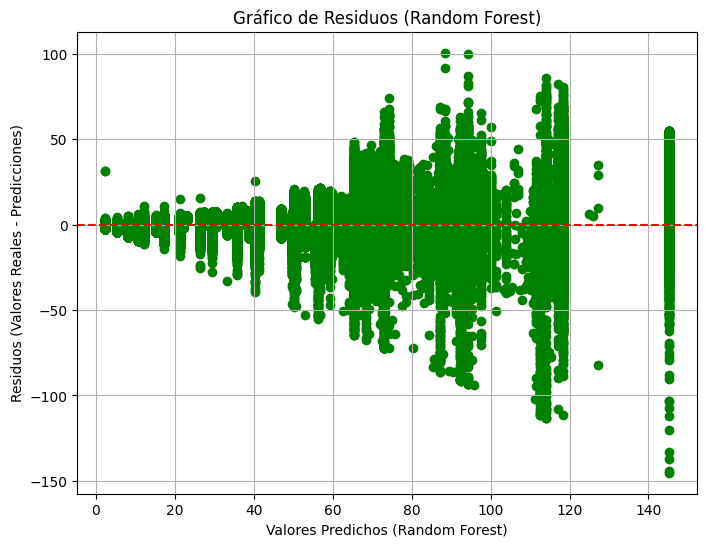

In [117]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
residuals_rf = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals_rf, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos (Random Forest)')
plt.ylabel('Residuos (Valores Reales - Predicciones)')
plt.title('Gráfico de Residuos (Random Forest)')
plt.grid(True)
plt.show()

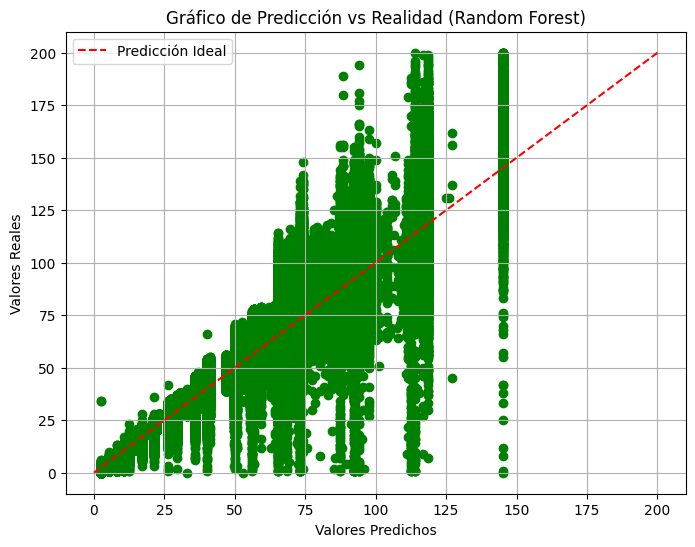

In [118]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf, y_test, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Predicción Ideal')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Reales')
plt.title('Gráfico de Predicción vs Realidad (Random Forest)')
plt.grid(True)
plt.legend()
plt.show()

In [54]:
df[df[target]>50].count()

Estación                 902
Año                      902
Mes                      902
Dia                      902
Hora                     902
Dióxido de Azufre        902
Monóxido de Carbono      902
Monóxido de Nitrógeno    902
Dióxido de Nitrógeno     902
Partículas<2.5           902
Partículas<10            902
Óxidos de Nitrógeno      902
Ozono                    902
Tolueno                  902
Benceno                  902
Etilbenceno              902
HidrocarburosTot         902
Metano                   902
HidrocarburosNoMet       902
Temperatura              902
PuntoRocio               902
TempHumeda               902
HumedadRelativa          902
Precipitacion            902
Presion                  902
VelViento                902
DirViento                902
Intensidad               902
MideSO2                  902
dtype: int64

In [60]:
df[df[target]>0].count()

Estación                 800011
Año                      800011
Mes                      800011
Dia                      800011
Hora                     800011
Dióxido de Azufre        800011
Monóxido de Carbono      800011
Monóxido de Nitrógeno    800011
Dióxido de Nitrógeno     800011
Partículas<2.5           800011
Partículas<10            800011
Óxidos de Nitrógeno      800011
Ozono                    800011
Tolueno                  800011
Benceno                  800011
Etilbenceno              800011
HidrocarburosTot         800011
Metano                   800011
HidrocarburosNoMet       800011
Temperatura              800011
PuntoRocio               800011
TempHumeda               800011
HumedadRelativa          800011
Precipitacion            800011
Presion                  800011
VelViento                800011
DirViento                800011
Intensidad               800011
MideSO2                  800011
dtype: int64